<a href="https://colab.research.google.com/github/ProInCPython/python_rep/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

data = pd.read_csv("students.csv")
data.drop(columns=['Student_ID','Last_Name', 'Email', 'Gender', 'Attendance (%)',
                   'Midterm_Score', 'Final_Score', 'Assignments_Avg',
                   'Quizzes_Avg', 'Participation_Score', 'Projects_Score',
                   'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities',
                   'Internet_Access_at_Home', 'Parent_Education_Level',
                   'Family_Income_Level', 'Stress_Level (1-10)',
                   'Sleep_Hours_per_Night'], inplace=True)
data.rename(columns={'First_Name' : 'Name',
                     'Department' : 'Group', 'Total_Score' : 'Score'}, inplace=True)

print("--------------Task 1--------------", '\n')
print(data.head(5), '\n')
print(data.info(), '\n')
print(data.describe(), '\n')

print("Средний балл студентов:", round(data["Score"].mean(), 2), '\n')
print(f"Кол-во студентов в каждой группе:\n{data['Group'].value_counts()}", '\n')

--------------Task 1-------------- 

    Name  Age        Group    Score
0   Omar   22  Mathematics  59.8865
1  Maria   18     Business  81.9170
2  Ahmed   24  Engineering  67.7170
3   Omar   24  Engineering  51.6535
4   John   23           CS  71.4030 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5000 non-null   object 
 1   Age     5000 non-null   int64  
 2   Group   5000 non-null   object 
 3   Score   5000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 156.4+ KB
None 

               Age        Score
count  5000.000000  5000.000000
mean     21.048400    71.652097
std       1.989786     7.230097
min      18.000000    50.602000
25%      19.000000    66.533875
50%      21.000000    71.696250
75%      23.000000    76.711625
max      24.000000    95.091500 

Средний балл студентов: 71.65 

Кол-во студентов в каждо

In [23]:
print("--------------Task 2--------------", '\n')

print(data[data["Score"] > 80])
print(data[data["Score"] > 80].sort_values('Score', ascending=False))

print("Самый старший студент:")
print(data[data["Age"] == data["Age"].max()].sort_values('Name', ascending=True).head(1), '\n')
print("Самый младший студент:")
print(data[data["Age"] == data["Age"].min()].sort_values('Name', ascending=True).head(1), '\n')

--------------Task 2-------------- 

       Name  Age        Group    Score
1     Maria   18     Business  81.9170
6     Ahmed   24     Business  82.8575
9      Sara   22     Business  82.7555
19     John   20           CS  80.2355
23     Liam   23           CS  81.2455
...     ...  ...          ...      ...
4973  Maria   21     Business  80.4500
4974   Liam   23  Engineering  92.6520
4983   Emma   22  Mathematics  90.1670
4984   Liam   20  Mathematics  83.4425
4992   Sara   18  Engineering  84.0425

[654 rows x 4 columns]
       Name  Age        Group    Score
1104   Emma   20           CS  95.0915
2108   Omar   23     Business  93.3160
4974   Liam   23  Engineering  92.6520
4711  Ahmed   22  Mathematics  91.8410
2218   Liam   23  Mathematics  91.7170
...     ...  ...          ...      ...
3292    Ali   18  Engineering  80.0630
3812   Sara   21  Engineering  80.0575
1020   Omar   23           CS  80.0545
2233   John   20  Mathematics  80.0290
1422   John   21  Mathematics  80.0020

[6

In [24]:
print("--------------Task 3--------------", '\n')

data.loc[5000] = ['David', 21, 'Mathematics', None]
data.loc[5001] = ['John', 19, None, None]
print(data.isna().sum())

data["Score"].fillna(data["Score"].mean(), inplace=True)

data.dropna(subset=['Group'], inplace=True)

print(data.tail(5))

--------------Task 3-------------- 

Name     0
Age      0
Group    1
Score    2
dtype: int64
       Name  Age        Group      Score
4996   Emma   19  Mathematics  59.024000
4997   John   24           CS  74.756000
4998   Sara   23  Engineering  68.658500
4999  Maria   21  Mathematics  78.748500
5000  David   21  Mathematics  71.652097


<ipython-input-24-371d6500ac75>:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data.loc[5000] = ['David', 21, 'Mathematics', None]
<ipython-input-24-371d6500ac75>:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data.loc[5001] = ['John', 19, None, None]
<ipython-input-24-371d6500ac75>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work bec

In [25]:
def is_passed(score):
    if score >= 60:
        return 1
    else:
        return 0

print("--------------Task 4--------------", '\n')

print(data.groupby(["Group"]).agg({'Score' : 'mean', 'Age' : 'median'}), '\n')


data["Passed"] = data["Score"].apply(func=is_passed)


print(data.head(10))

--------------Task 4-------------- 

                 Score   Age
Group                       
Business     71.922656  21.0
CS           71.434113  21.0
Engineering  71.689880  21.0
Mathematics  71.554025  21.0 

    Name  Age        Group    Score  Passed
0   Omar   22  Mathematics  59.8865       0
1  Maria   18     Business  81.9170       1
2  Ahmed   24  Engineering  67.7170       1
3   Omar   24  Engineering  51.6535       0
4   John   23           CS  71.4030       1
5   Liam   21  Mathematics  68.0900       1
6  Ahmed   24     Business  82.8575       1
7  Ahmed   19  Engineering  71.3685       1
8   Omar   21           CS  65.8605       1
9   Sara   22     Business  82.7555       1


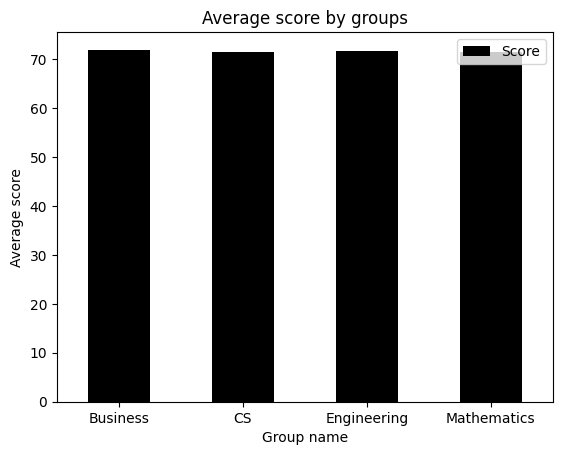

In [26]:
import matplotlib.pyplot as plt

data_grouped = data.groupby(["Group"])["Score"].mean()
data_grouped.plot(kind="bar", x="Group", y="Score", xlabel="Group name", ylabel="Average score", title="Average score by groups", rot=0, colormap="gist_heat")

plt.legend()
plt.show()